In [40]:
from sklearn.model_selection import train_test_split
import pandas as pd


In [2]:
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()

In [49]:
iris_df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
target_df=pd.DataFrame(data=iris.target,columns=['species'])


In [11]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
def converter(s):
    if s==0:
        return 'setosa'
    elif s==1:
        return 'versicolor'
    else:
        return 'virginica'
target_df['species']=target_df['species'].apply(converter)


In [23]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
import seaborn as sns

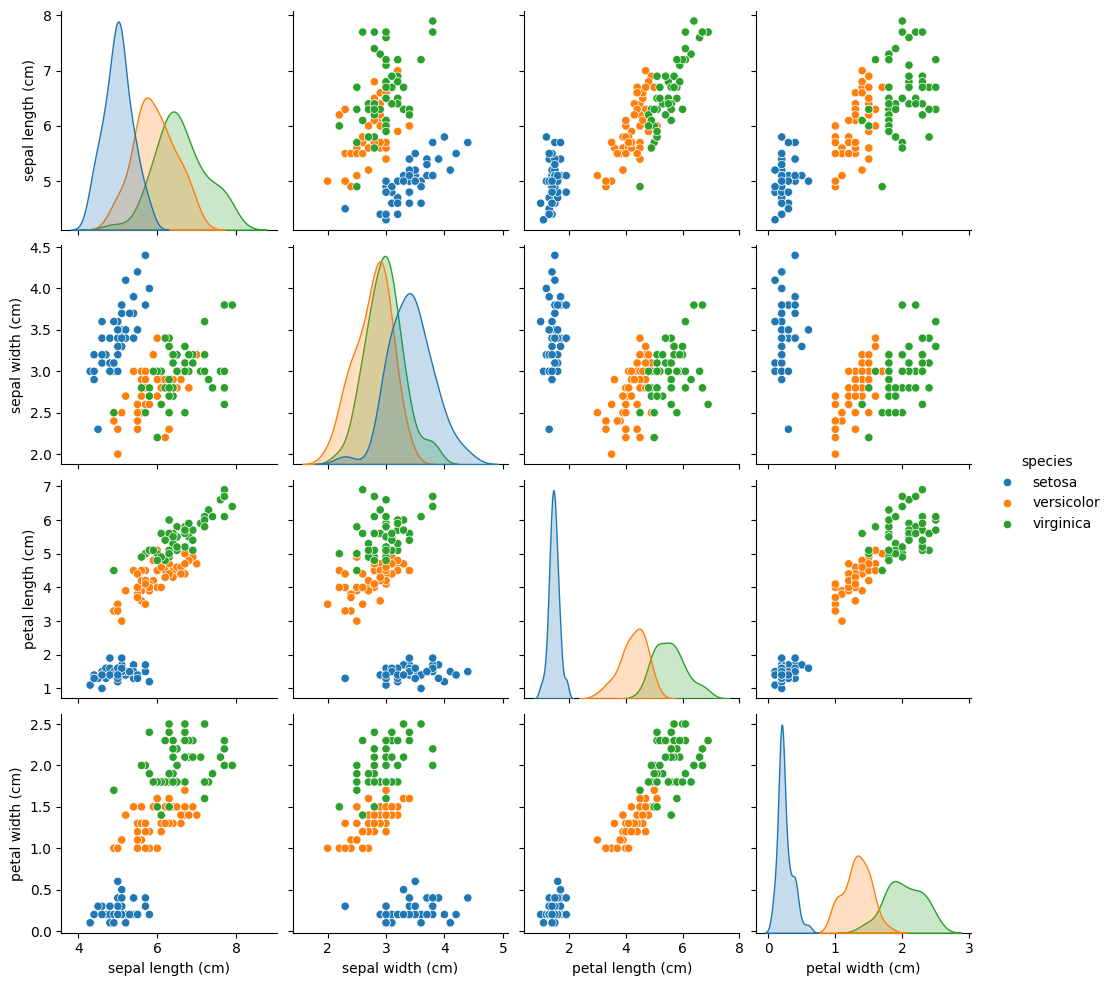

In [26]:
sns.pairplot(iris_df, hue= 'species')

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt

In [29]:
x=iris.data
y=iris.target


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=101)

In [31]:
model=LinearRegression()


In [32]:
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
model.coef_ # y=ax1+bx2+cx3+dx4+e   a,b,c,d  weights

array([-0.07119253, -0.11163294,  0.16263515,  0.70147897])

In [ ]:
model.intercept_  # e - bias

np.float64(0.3104267918246677)

In [33]:
y_pred=model.predict(x_test)

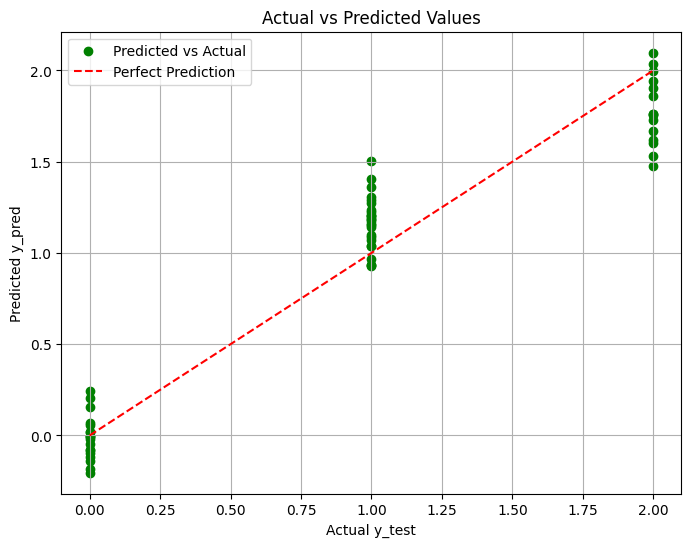

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')

plt.xlabel('Actual y_test')
plt.ylabel('Predicted y_pred')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.04509102579957459
Mean Absolute Error: 0.16768702032039684


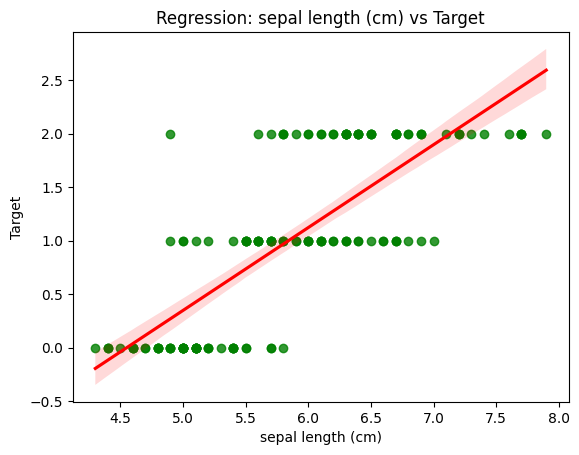

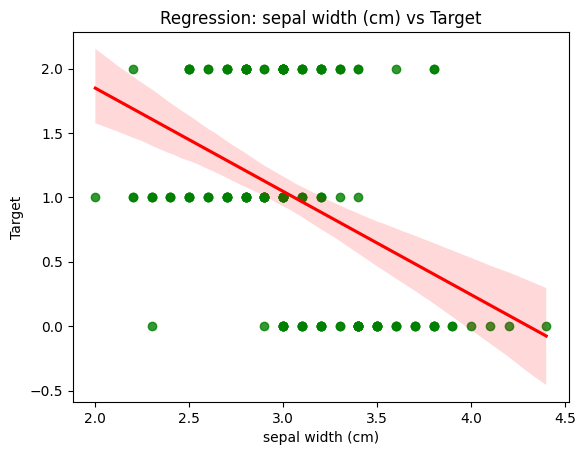

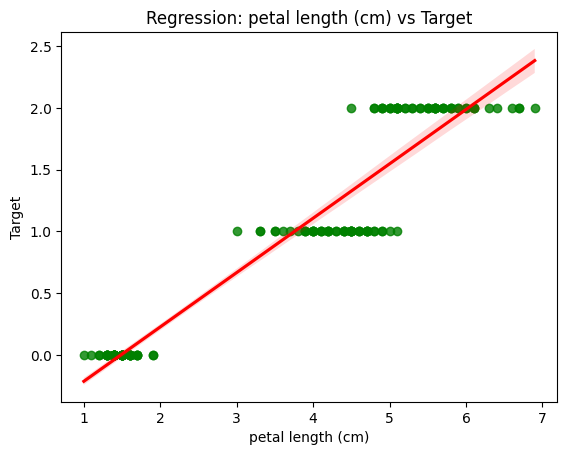

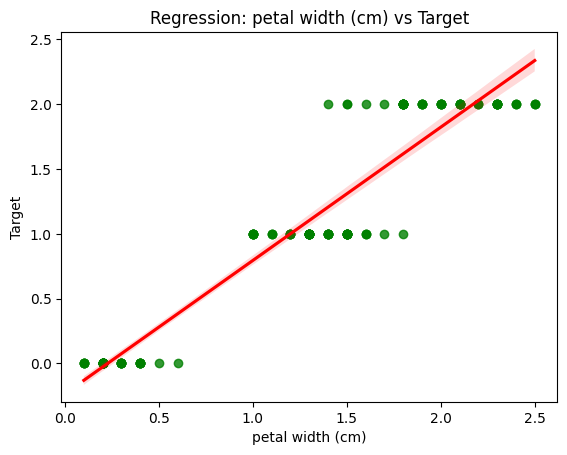

In [50]:
for column in iris_df.columns:
    sns.regplot(x=iris_df[column], y=y, color="green", line_kws={"color": "red"})
    plt.title(f'Regression: {column} vs Target')
    plt.xlabel(column)
    plt.ylabel("Target")
    plt.show()